In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

cat_images = np.random.randn(700, 2) + np.array([0, -3])
mouse_images = np.random.randn(700, 2) + np.array([3, 3])
dog_images = np.random.randn(700, 2) + np.array([-3, 3])

In [9]:
feature_set = np.vstack([cat_images, mouse_images, dog_images])

In [10]:
labels = np.array([0]*700 + [1]*700 + [2]*700)

In [11]:
one_hot_labels = np.zeros((2100, 3))

for i in range(2100):
    one_hot_labels[i, labels[i]] = 1

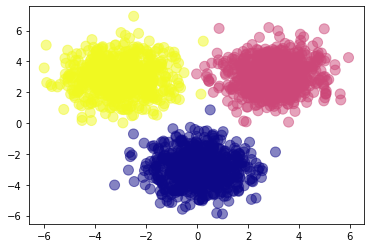

In [12]:
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap='plasma', s=100, alpha=0.5)
plt.show()

In [13]:
def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum()

nums = np.array([4, 5, 6])
print(softmax(nums))

[0.09003057 0.24472847 0.66524096]


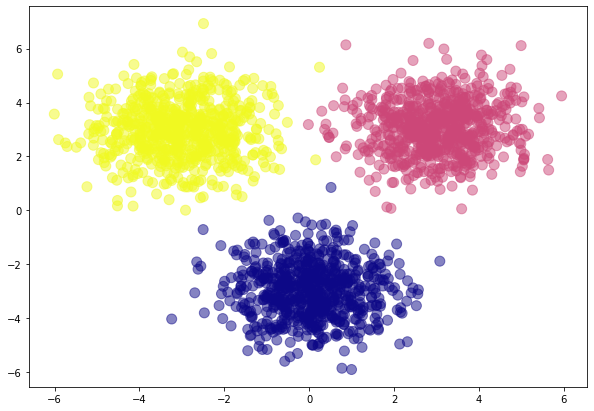

Loss function value:  3101.277959261377
Loss function value:  20.518567596960878
Loss function value:  13.41539643356695
Loss function value:  10.806239114192765
Loss function value:  9.293853043370646
Loss function value:  8.222335562342458
Loss function value:  7.427291388788854
Loss function value:  6.815957335510987
Loss function value:  6.3288007427772985
Loss function value:  5.929800342065818
Loss function value:  5.595779425599993
Loss function value:  5.311118805512471
Loss function value:  5.064894173306703
Loss function value:  4.8492259609852475
Loss function value:  4.658281872646844
Loss function value:  4.487648995564465
Loss function value:  4.333924545010694
Loss function value:  4.1944409886297365
Loss function value:  4.067076566158793
Loss function value:  3.950121680373943
Loss function value:  3.84218278881702
Loss function value:  3.7421120397586787
Loss function value:  3.6489549384881395
Loss function value:  3.561910868828659
Loss function value:  3.4803029282

Loss function value:  0.6765710714156111
Loss function value:  0.6728466698172143
Loss function value:  0.669156602978459
Loss function value:  0.6655004408652806
Loss function value:  0.6618777601441355
Loss function value:  0.6582881440564665
Loss function value:  0.6547311822959557
Loss function value:  0.6512064708885407
Loss function value:  0.6477136120750688
Loss function value:  0.6442522141965419
Loss function value:  0.6408218915819195
Loss function value:  0.6374222644383689
Loss function value:  0.634052958743841
Loss function value:  0.6307136061421299
Loss function value:  0.6274038438400549
Loss function value:  0.6241233145069198
Loss function value:  0.6208716661761522
Loss function value:  0.6176485521490055
Loss function value:  0.6144536309003231
Loss function value:  0.6112865659862842
Loss function value:  0.6081470259541555
Loss function value:  0.6050346842538701
Loss function value:  0.6019492191514677
Loss function value:  0.5988903136443748
Loss function valu

In [15]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

cat_images = np.random.randn(700, 2) + np.array([0, -3])
mouse_images = np.random.randn(700, 2) + np.array([3, 3])
dog_images = np.random.randn(700, 2) + np.array([-3, 3])

feature_set = np.vstack([cat_images, mouse_images, dog_images])

labels = np.array([0]*700 + [1]*700 + [2]*700)

one_hot_labels = np.zeros((2100, 3))

for i in range(2100):
    one_hot_labels[i, labels[i]] = 1

plt.figure(figsize=(10,7))
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap='plasma', s=100, alpha=0.5)
plt.show()

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

instances = feature_set.shape[0]
attributes = feature_set.shape[1]
hidden_nodes = 4
output_labels = 3

wh = np.random.rand(attributes,hidden_nodes)
bh = np.random.randn(hidden_nodes)

wo = np.random.rand(hidden_nodes,output_labels)
bo = np.random.randn(output_labels)
lr = 10e-4

error_cost = []

for epoch in range(50000):
############# feedforward

    # Phase 1
    zh = np.dot(feature_set, wh) + bh
    ah = sigmoid(zh)

    # Phase 2
    zo = np.dot(ah, wo) + bo
    ao = softmax(zo)

########## Back Propagation

########## Phase 1

    dcost_dzo = ao - one_hot_labels
    dzo_dwo = ah

    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)

    dcost_bo = dcost_dzo

########## Phases 2

    dzo_dah = wo
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = sigmoid_der(zh)
    dzh_dwh = feature_set
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

    dcost_bh = dcost_dah * dah_dzh

    # Update Weights ================

    wh -= lr * dcost_wh
    bh -= lr * dcost_bh.sum(axis=0)

    wo -= lr * dcost_wo
    bo -= lr * dcost_bo.sum(axis=0)

    if epoch % 200 == 0:
        loss = np.sum(-one_hot_labels * np.log(ao))
        print('Loss function value: ', loss)
        error_cost.append(loss)